In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

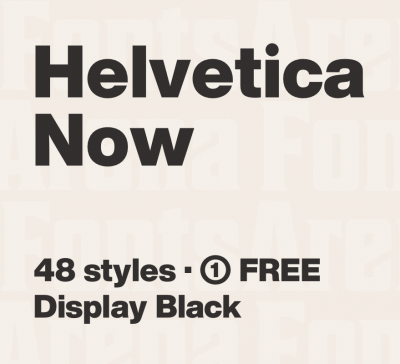

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

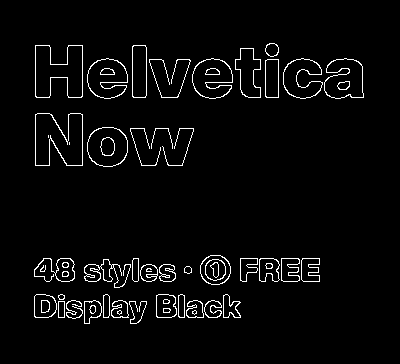

In [5]:
cv2_imshow(edges)

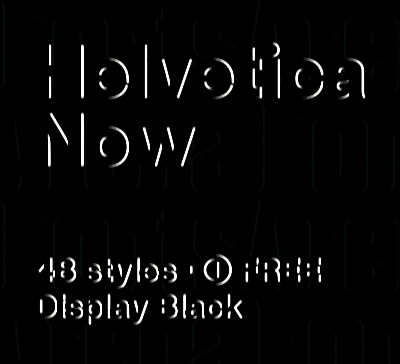

In [6]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Horizontal edge detector kernel**

The movement of the kernel starts from the topmost left cell and moves from left to right. Once the topmost line of cells complete, it moves to next line and again move from left to right. In such a movement, horizontal edges are represented by cells which have different values on the left and right sides of the cell and same value on the top and bottom (or atleast one).

To detect such cells, we use a kernel which rewards the values when the receptive field has different values in left and right but same values on top and bottom (or atleast one). 

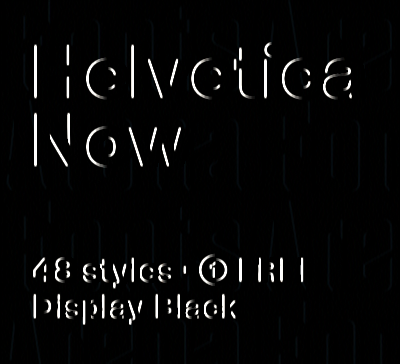

In [23]:
kernel = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**45 Degree Edge Detector**

Similar to explanation above, for deleting 45 degree edges, the kernel should reward the diagonal values more. Below kernel gives the 45 degree edge detector.

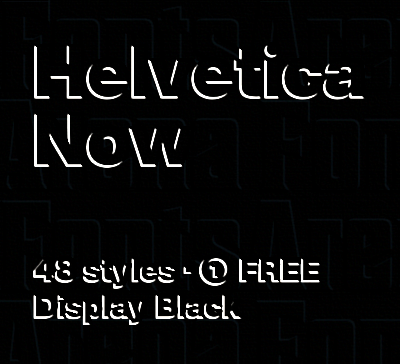

In [24]:
kernel = np.float32([[0,-1,-2],[1,0,-1],[2,1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Kernel to blur the image**

The idea to blur the image is to reduce the gap between the bright and dark cells. This can be achieved by reducing the value of the cells as well as reducing the gap between the bright and dark cell values when those are adjacent. 

Below kernel performs the blurring.

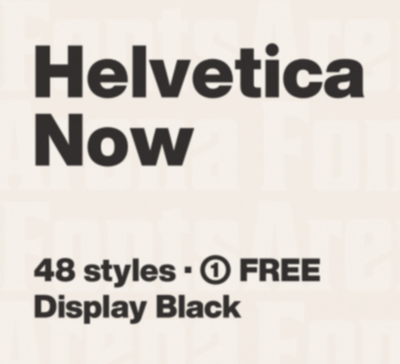

In [19]:
kernel = np.float32([[.0625,.125,.0625],[.125,.25,.125],[.0625,.125,.0625]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Kernel to sharpen the image**

To shrpen the image, increase the gap between the values of the bright and dark cells when those are adjacent. Following kernel below performs the operation.

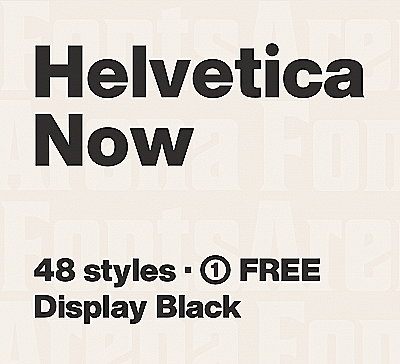

In [20]:
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Identity Function**


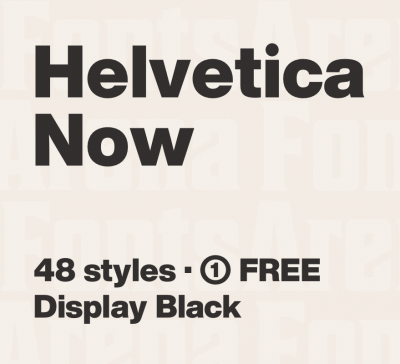

In [22]:
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)